In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart_attack_germany.csv')

In [3]:
data.head()

,State,Age_Group,Heart_Attack_Incidence,Year,Gender,BMI,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Diet_Quality,...,Cholesterol_Level,Diabetes,Urban_Rural,Socioeconomic_Status,Air_Pollution_Index,Stress_Level,Healthcare_Access,Education_Level,Employment_Status,Region_Heart_Attack_Rate
0,Lower Saxony,Youth,0,2018,Other,25.6,Former Smoker,4.2,Moderate,Average,...,154.4,0,Rural,Low,31.58,Moderate,Moderate,Primary,Retired,1.92
1,Saxony,Adult,0,2021,Female,36.7,Smoker,2.4,Low,Poor,...,75.0,1,Rural,Low,46.22,High,Easy,Primary,Unemployed,14.16
2,Hesse,Youth,1,2022,Female,28.6,Smoker,29.5,High,Poor,...,121.9,0,Urban,Middle,15.69,High,Hard,Secondary,Student,3.49
3,Lower Saxony,Adult,0,2015,Male,27.6,Non-Smoker,4.2,Moderate,Poor,...,152.3,0,Urban,Low,26.50,High,Hard,Tertiary,Student,3.24
4,Hamburg,Adult,0,2015,Female,15.2,Smoker,4.3,Moderate,Good,...,130.3,0,Urban,High,11.21,High,Moderate,Tertiary,Employed,9.98


In [4]:
data.shape

(275644, 22)

In [5]:
data


,State,Age_Group,Heart_Attack_Incidence,Year,Gender,BMI,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Diet_Quality,...,Cholesterol_Level,Diabetes,Urban_Rural,Socioeconomic_Status,Air_Pollution_Index,Stress_Level,Healthcare_Access,Education_Level,Employment_Status,Region_Heart_Attack_Rate
0,Lower Saxony,Youth,0,2018,Other,25.6,Former Smoker,4.2,Moderate,Average,...,154.4,0,Rural,Low,31.58,Moderate,Moderate,Primary,Retired,1.92
1,Saxony,Adult,0,2021,Female,36.7,Smoker,2.4,Low,Poor,...,75.0,1,Rural,Low,46.22,High,Easy,Primary,Unemployed,14.16
2,Hesse,Youth,1,2022,Female,28.6,Smoker,29.5,High,Poor,...,121.9,0,Urban,Middle,15.69,High,Hard,Secondary,Student,3.49
3,Lower Saxony,Adult,0,2015,Male,27.6,Non-Smoker,4.2,Moderate,Poor,...,152.3,0,Urban,Low,26.50,High,Hard,Tertiary,Student,3.24
4,Hamburg,Adult,0,2015,Female,15.2,Smoker,4.3,Moderate,Good,...,130.3,0,Urban,High,11.21,High,Moderate,Tertiary,Employed,9.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275639,Baden-Württemberg,Adult,0,2022,Female,27.2,Non-Smoker,2.7,High,Poor,...,114.1,0,Rural,Low,27.01,High,Easy,Primary,Unemployed,15.37
275640,Hesse,Adult,0,2021,Male,28.4,Smoker,9.5,Low,Good,...,80.8,1,Rural,Low,45.26,Moderate,Hard,Secondary,Retired,8.37
275641,North Rhine-Westphalia,Adult,0,2016,Other,33.2,Non-Smoker,7.7,Moderate,Good,...,120.7,0,Urban,Low,21.63,High,Moderate,Primary,Employed,5.11
275642,Hamburg,Youth,0,2021,Male,37.7,Former Smoker,19.3,High,Average,...,139.5,1,Urban,Low,10.29,High,Moderate,Secondary,Retired,9.13


In [6]:
data.describe()

,Heart_Attack_Incidence,Year,BMI,Alcohol_Consumption,Family_History,Hypertension,Cholesterol_Level,Diabetes,Air_Pollution_Index,Region_Heart_Attack_Rate
count,275644.000000,275644.000000,275644.000000,275644.000000,275644.000000,275644.000000,275644.000000,275644.000000,275644.000000,275644.000000
mean,0.150070,2018.997319,24.992669,4.985734,0.300540,0.400564,130.034229,0.199525,27.486225,10.489019
std,0.357141,2.582667,4.996535,5.001789,0.458494,0.490014,30.009242,0.399644,13.001527,5.483277
min,0.000000,2015.000000,1.400000,0.000000,0.000000,0.000000,-7.900000,0.000000,5.000000,1.000000
25%,0.000000,2017.000000,21.600000,1.400000,0.000000,0.000000,109.800000,0.000000,16.220000,5.750000
50%,0.000000,2019.000000,25.000000,3.500000,0.000000,0.000000,130.100000,0.000000,27.430000,10.490000
75%,0.000000,2021.000000,28.400000,6.900000,1.000000,1.000000,150.300000,0.000000,38.780000,15.240000
max,1.000000,2023.000000,47.900000,70.000000,1.000000,1.000000,272.400000,1.000000,50.000000,20.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275644 entries, 0 to 275643
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   State                     275644 non-null  object 
 1   Age_Group                 275644 non-null  object 
 2   Heart_Attack_Incidence    275644 non-null  int64  
 3   Year                      275644 non-null  int64  
 4   Gender                    275644 non-null  object 
 5   BMI                       275644 non-null  float64
 6   Smoking_Status            275644 non-null  object 
 7   Alcohol_Consumption       275644 non-null  float64
 8   Physical_Activity_Level   275644 non-null  object 
 9   Diet_Quality              275644 non-null  object 
 10  Family_History            275644 non-null  int64  
 11  Hypertension              275644 non-null  int64  
 12  Cholesterol_Level         275644 non-null  float64
 13  Diabetes                  275644 non-null  i

In [8]:
# checknull values
data.isnull().sum()

,0
State,0
Age_Group,0
Heart_Attack_Incidence,0
Year,0
Gender,0
BMI,0
Smoking_Status,0
Alcohol_Consumption,0
Physical_Activity_Level,0
Diet_Quality,0


In [9]:
# Identification of redundancies
data.duplicated().sum()

0

In [10]:
#fill missing value
data.fillna(data, inplace=True)

In [11]:
data.shape

(275644, 22)

# EDA

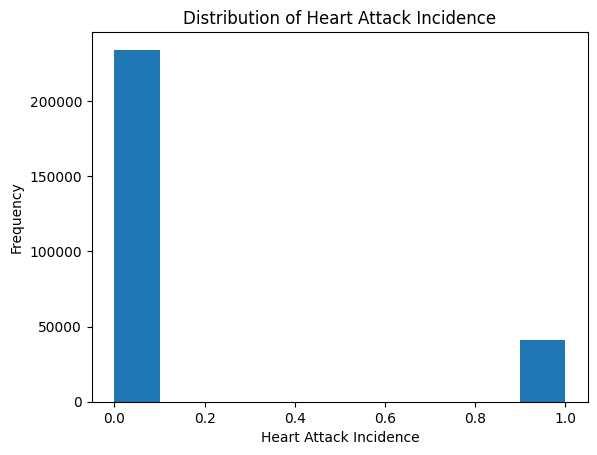

In [12]:
# plot histogram
plt.hist(data['Heart_Attack_Incidence'])
plt.title('Distribution of Heart Attack Incidence')
plt.xlabel('Heart Attack Incidence')
plt.ylabel('Frequency')
plt.show()

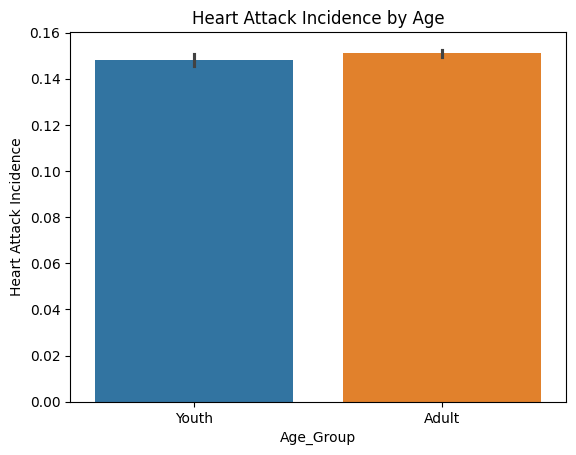

In [13]:
sns.barplot(x='Age_Group', y='Heart_Attack_Incidence',data=data,hue='Age_Group')
plt.title('Heart Attack Incidence by Age')
plt.xlabel('Age_Group')
plt.ylabel('Heart Attack Incidence')
plt.show()

# conclusion of barplot
The bar plot shows the heart attack incidence across different age groups.


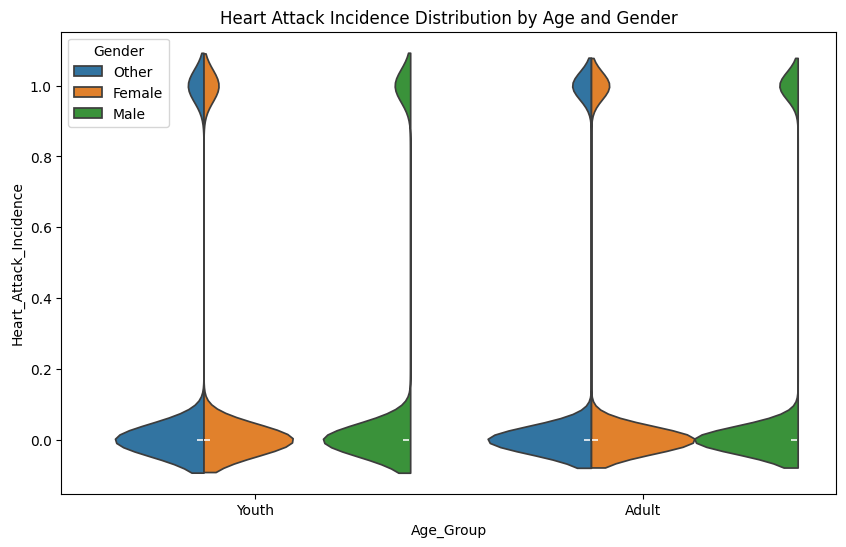

In [14]:
#Distribution of heart attack incidence for different genders within each age group.
plt.figure(figsize=(10, 6))
sns.violinplot(x='Age_Group', y='Heart_Attack_Incidence', hue='Gender', data=data, split=True)
plt.title('Heart Attack Incidence Distribution by Age and Gender')
plt.show()


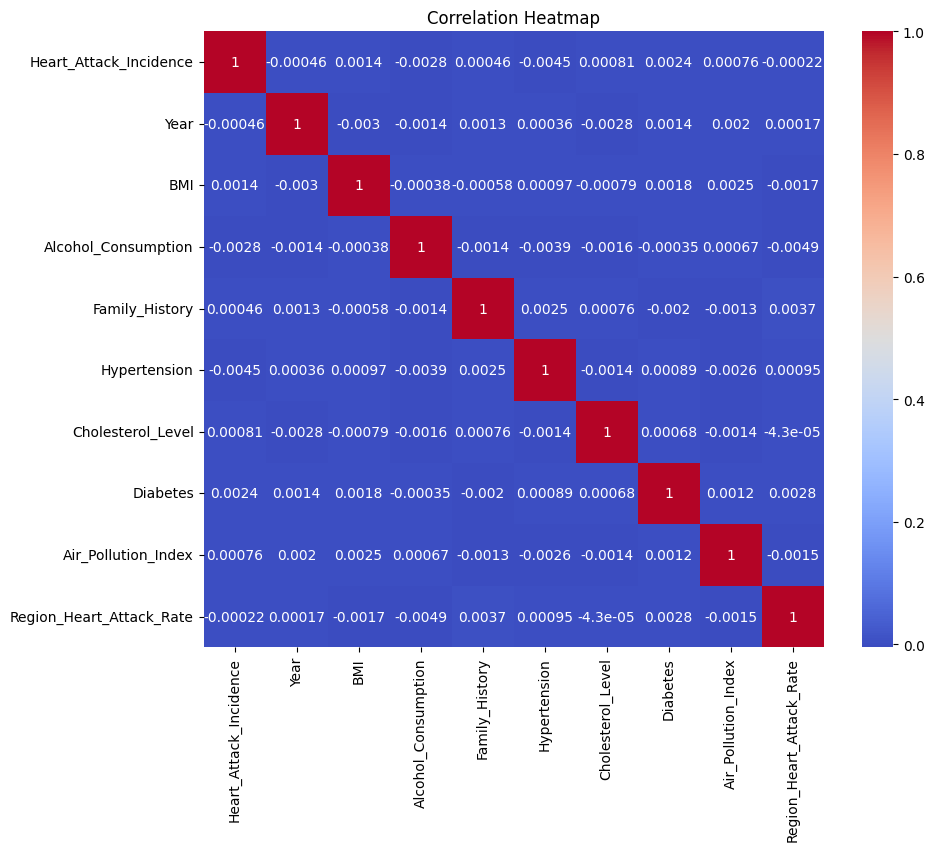

In [15]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include=["float64", "int64"])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Conclusion of heatmap

#### * The heatmap visualizes the correlation coefficients between numeric variables.
#### * Positive values indicate a positive correlation, negative values indicate a negative correlation, and values close to zero suggest a weak or no linear relationship.  This helps identify potential relationships between variables for further analysis.

# FEATURE ENGINEERING

In [16]:
# Encode categorical variables
categorical_cols = [
    'State', 'Age_Group', 'Gender', 'Smoking_Status', 'Urban_Rural',
    'Diet_Quality', 'Physical_Activity_Level', 'Socioeconomic_Status',
    'Employment_Status', 'Education_Level'
]

In [17]:
# Scale numerical features
numerical_cols = ['BMI', 'Cholesterol_Level', 'Air_Pollution_Index', 'Alcohol_Consumption', 'Stress_Level']

In [18]:
X = data.drop(columns=['Heart_Attack_Incidence'])  # Features
y = data['Heart_Attack_Incidence']  # Target

In [19]:
# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [20]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Inspect non-numeric columns, if any
non_numeric_columns = X_train.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_columns)

# Check unique values in these columns
for col in non_numeric_columns:
    print(f"Unique values in {col}:", X_train[col].unique())

Non-numeric columns: Index([], dtype='object')


In [22]:
# Check for non-numeric values in y_train
print("y_train unique values:", y_train.unique())

y_train unique values: [0 1]


In [23]:
# Label encoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [24]:
y_train_encoded

array([0, 1, 0, ..., 0, 1, 0])

In [25]:
y_test_encoded

array([0, 0, 0, ..., 1, 1, 0])

In [26]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8491900814453373

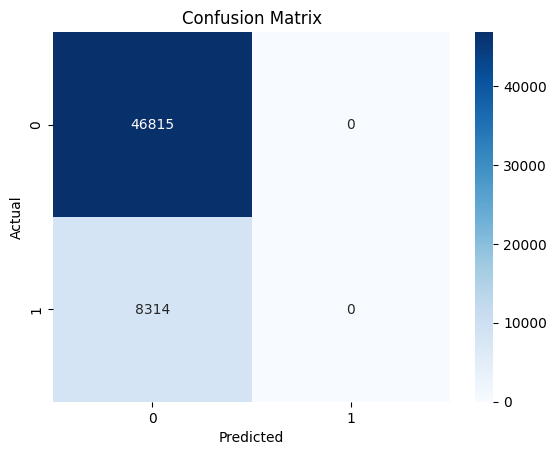

In [27]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     46815
           1       0.00      0.00      0.00      8314

    accuracy                           0.85     55129
   macro avg       0.42      0.50      0.46     55129
weighted avg       0.72      0.85      0.78     55129



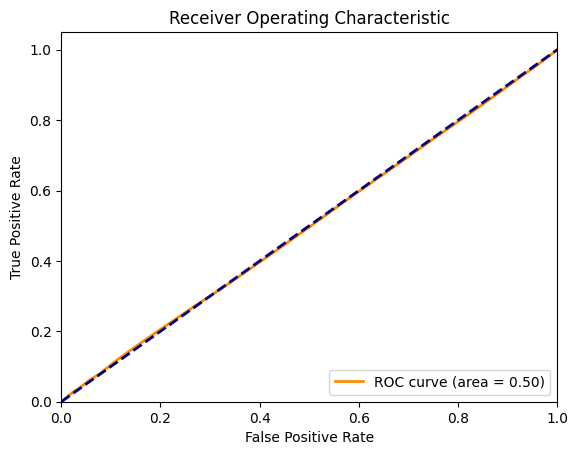

In [29]:
# prompt: roc auc curve

from sklearn.metrics import roc_curve, auc

# Assuming you have y_test and y_pred_proba (probability predictions)
# If you don't have probabilities, you can get them like this:
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

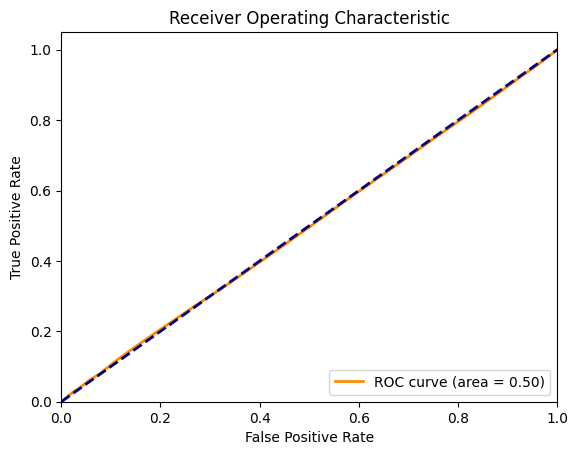

In [30]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [31]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [32]:
# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

Logistic Regression Accuracy: 0.8491900814453373


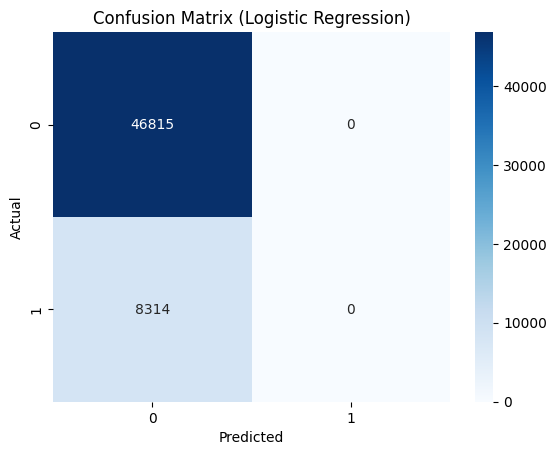

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     46815
           1       0.00      0.00      0.00      8314

    accuracy                           0.85     55129
   macro avg       0.42      0.50      0.46     55129
weighted avg       0.72      0.85      0.78     55129



In [33]:
# Confusion Matrix for Logistic Regression
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report for Logistic Regression
print(classification_report(y_test, y_pred_logreg))

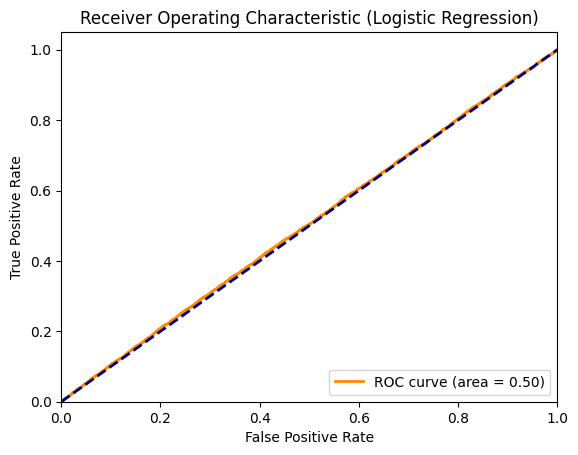

In [34]:
# ROC Curve for Logistic Regression
y_pred_proba_logreg = logreg_model.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_logreg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.legend(loc='lower right')
plt.show()

**Discussion and Future Work**
In this notebook, we explored the heart attack incidence data in Germany, focusing on differences between youth and adults. We performed data cleaning, exploratory data analysis, feature engineering, and built a predictive model using a Random Forest Classifier. The model achieved a certain level of accuracy, as indicated by the accuracy score and ROC curve.

**Merits of the Approach:**
1. **Comprehensive Data Cleaning:** This is crucial for ensuring the reliability of your analysis and model performance.
2. **Exploratory Data Analysis (EDA):** It's great that you gained insights into feature distributions and correlations, which can guide further model improvements.
3. **Feature Engineering:** This step often enhances model performance by creating more informative features from the raw data.
4. **Random Forest Classifier:** It's noted for its robustness and interpretability, which are valuable in understanding the factors contributing to heart attack incidences.

**Future Work Suggestions:**
1. **Explore Other Models:** Trying out different algorithms (like SVMs, Gradient Boosting Machines, or Neural Networks) could potentially improve predictive accuracy.
   
2. **Hyperparameter Tuning:** Optimizing parameters like the number of trees, depth of trees, and other settings specific to Random Forest can often yield better results.
   
3. **Incorporate Additional Features:** Consider adding new features if available (such as socio-economic indicators, environmental factors, or lifestyle data) that could enrich your model's predictive ability.
   
4. **External Datasets:** Integrating data from external sources (like demographic data, health statistics from neighboring regions, or climate data) could provide deeper insights into the factors influencing heart attack rates.

5. **Model Evaluation:** Ensure robust evaluation metrics beyond accuracy, such as precision, recall, and F1-score, especially given the potential class imbalance in predicting heart attack incidences.
